In [1]:
import pandas as pd

url = "https://stats.idre.ucla.edu/stat/stata/dae/binary.dta"
df = pd.read_stata(url)

df.to_csv("admission_data.csv", index=False)

df.head()

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
print(df.head())

   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


In [4]:
X = df[['gre', 'gpa', 'rank']]
y = df['admit']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(x_test)

In [8]:
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [9]:
print("Confusion Matrix:\n", conf_mat)
print("Accuracy Score:", acc)
print("Accuracy in Percentage:", int(acc * 100), "%")

Confusion Matrix:
 [[51  2]
 [25  2]]
Accuracy Score: 0.6625
Accuracy in Percentage: 66 %


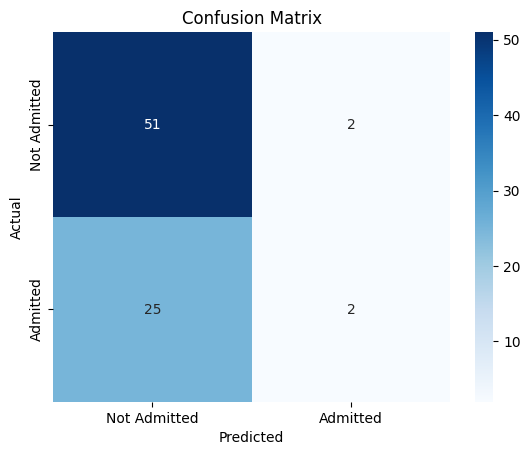

In [10]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()